# Lottery Math  

This is the accompaying Jupyter Notebook to [my article 网站已失效](http://urbanscientist.cool/articles/19/Mathematics-of-the-Powerball-blog/). Here we will take a quick computational walkthrough the article and the functions defined within it. 来自：https://github.com/UrbanScientist

## Calculating the Total number of Combinations & Permutations
As in the article I am quick to point out that factorials are computationally ineffecient. We will use them for simple explanation’s sake. Using the defined n, and k within equation in the article. We us them below to arrive at the total number of combinations including permutations, or just combinations within the Powerball lottery.

* *n = denotes the maximum value in a range from (1,n)*
* *k = denotes the number of values selected from the n range*

The computational expression of the binomial coefficient calculation expresses the optionality to include or exclude permutations using the perm parameter. There is also a Scipy Module that can be used called "binom()"there is however no way to alter it to have permutations within it. This is why we built our own binomial function. 

In [ ]:
#Import the Necessities
from scipy.special import factorial, binom
import numpy as np
import pandas as pd

def binomial_coefficient(n,k,perm=False):
    '''Calculates the Binomial Coefficient (n choose k)

    Keyword Arguments:
    n = denotes the maximum value in a range from (1,n)
    k = denotes the number of values selected from the (1,n) range
    perm = denotes whether permutations are included
    '''
    if perm is True:
        binomial_coefficient = round((factorial(n)) / factorial(n-k))
    else:
        binomial_coefficient = round((factorial(n)) / (factorial(k) * factorial(n-k)))
    return binomial_coefficient

### Total Number of Combinations and Permutations 

Taking note that the powerball is a *selection without replacement* meaning that once a number is drawn out of a pool it can no longer be drawn. This means that we must get rid of any permuatations within our calculation. 

In [ ]:
binomial_coefficient(69,5,perm=True)

### Total Number of Combinations

Using the function without using the perm parameter, or declaring it false yeilds us with the total number of combinations deviod of any permutations. 

In [ ]:
#binomial_coefficient(69,5, perm=False)
binomial_coefficient(69,5)

## Calculating the Odds of Each Ticket Combination

This function gives us the ability to calcluate the range of odds of drawing X correct balls in a non-powerball or one-powerball style lottery. The function takes the n,k,and pmax parameters as inputs and 2 lists with the calculated odds of winning with the powerball or without the powerball. In a lottery without the powerball pool it returns an empty list. 

In [2]:
def powerball_odds(n,k,pmax=0):
    '''Calcluates the range of odds of drawing X correct balls in a non-powerball or one-powerball style lottery.
    
    Keyword Arguments:
    n: The total number of balls in the lottery's drawing
    k: The total number of balls that a player can draw out of the n pool
    pmax:(optional): The maximum value if there is a powerball drawn from a seperate pool.        
    '''
    global odds_list
    global odds_list_PB
    odds_list_PB = []
    odds_list = []
    m = n-k
    for i in range(k+1):
        f = k-i
        odds_a = binomial_coefficient(k,i)
        odds_b = binomial_coefficient(m,f)
        odds_c = binomial_coefficient(n,k)
        if pmax == 0:
            odds = 1/((odds_a * odds_b)/odds_c)
            odds_list.append(odds)
        else:
            odds_d = 1/((odds_a * odds_b)/odds_c)
            odds_PB = odds_d * pmax
            odds_wo_PB = odds_d * pmax / (pmax - 1)
            odds_list_PB.append(odds_PB)
            odds_list.append(odds_wo_PB)
    return odds_list, odds_list_PB

### Calculating the odds of the Powerball from October 2015 - Current

In [ ]:
powerball_odds(69,5,pmax=26)

### A Quick Clean
Lets Clean the lists up a bit. 

In [3]:
#Define the Ticket Combinations
Correct_Numbers = [i for i in range(6)]
Correct_Powerball = 'Powerball'
Incorrect_Powerball = 'No Powerball'
    
#Define the Payouts ($)
PayoutW_69 = [4,4,7,100,50000,'Jackpot']
PayoutWO = [0,0,0,7,100,1000000]
    
#Clean the Odds Lists
OddsWO = list(map(lambda x: int(x), odds_list))
Odds_W = list(map(lambda x: int(x), odds_list_PB))
    
#Create the DataFrame    
OddsW_6926 = pd.DataFrame({'# Correct':Correct_Numbers, 'Correct Powerball #': Correct_Powerball,'Odds1: 1/Probability': Odds_W,
                            'Payout':PayoutW_69})
OddsWO_6926 = pd.DataFrame({'# Correct':Correct_Numbers, 'Correct Powerball #': Incorrect_Powerball,'Odds: 1/Probability':OddsWO,
                             'Payout': PayoutWO})

NameError: name 'odds_list' is not defined

### The Odds with getting the correct Powerball

This dataframe also includes the associated payouts in ($) in the payout column.  

In [ ]:
OddsW_6926

### The Odds without getting the correct Powerball

In [ ]:
OddsWO_6926

### Calculating the odds of the Powerball from January 2012 - October 2015

Let us take a look at how the powerball has changed from the most previous version of the game. It was played where, n = 59, k = 5, and the size of the pool that the powerball could be drawn from ranged to 35. This when ran through the same processes that weused prior shows us how the odds have changed in our favor. 

In [ ]:
powerball_odds(59,5,pmax=35)

In [ ]:
#Define the Payouts ($)
PayoutW_59 = [4,4,7,100,10000,'Jackpot']
PayoutWO = [0,0,0,7,100,1000000]
    
#Clean the Odds Lists
Odds_WO59 = list(map(lambda x: int(x), odds_list))
Odds_W59 = list(map(lambda x: int(x), odds_list_PB))

#Create the DataFrame    
OddsW_5935 = pd.DataFrame({'# Correct':Correct_Numbers, 'Correct Powerball #': Correct_Powerball,'Odds1: 1/Probability': Odds_W59,
                            'Payout':PayoutW_59})
OddsWO_5935 = pd.DataFrame({'# Correct':Correct_Numbers, 'Correct Powerball #': Incorrect_Powerball,'Odds: 1/Probability':Odds_WO59,
                             'Payout': PayoutWO})

### The Odds with getting the correct Powerball (2012-2015)

In [ ]:
OddsW_5935

### The Odds without getting the correct Powerball (2012-2015)

In [ ]:
OddsWO_5935

## A Quick Comparison between the two Odds

In [ ]:
difference = [Odds_W[i] - Odds_W59[i] for i in range(5)]
print(difference)

In [ ]:
difference1 = [OddsWO[i] - Odds_WO59[i] for i in range(5)]
print(difference1)

### The change in 2015

That change in the sizes of the pools in the powerball accomplished two things. It first improved the odds of having a winning ticket with the powerball for tickets with 3 correct numbers or less. Secondly it decreased the odds of having a winning ticket with the powerball for tickets with 4 or more correct numbers. For tickets without the correct powerball the odds of winning either stayed the same or increased. This change has allowed the powerball to increase the coverage of the lottery thus implicitly causing higher jackpot payouts. 

## God's view

In [ ]:
# Importing modules
import random
from scipy.stats import rankdata
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter

guessed_balls = 0  #guessed balls
lottery_balls = 1  #lottery balls

# set high level stats
plays = 0
ticket_spending = 0
winnings = 0

# set records of winnings
jackpot = 0
five_white = 0
four_white_mega = 0
four_white = 0
three_white_mega = 0
three_white = 0
two_white_mega = 0
one_white_mega = 0
mega = 0
dud = 0
won = plays-dud

# 这个循环 Loop 跑了两个小时

while guessed_balls != lottery_balls:
    
    guessed_balls = sorted(random.sample(range(1,69), 5))
    guessed_balls_set = set(guessed_balls)
    guessed_megaball = random.randint(1,26)
    guessed_balls.append(guessed_megaball)  # 加入附加球

    lottery_balls = sorted(random.sample(range(1,69), 5))
    lottery_balls_set = set(lottery_balls)
    lottery_megaball = random.randint(1,26)
    lottery_balls.append(lottery_megaball)  # 加入附加球
    
    difference_whites = len(guessed_balls_set.symmetric_difference(lottery_balls_set))
    plays +=1
    ticket_spending +=2
    
    #dud1
    if difference_whites == 10 and guessed_megaball != lottery_megaball:
        dud +=1
    #dud2
    elif difference_whites == 8 and guessed_megaball != lottery_megaball:
        dud +=1
    #dud3
    elif difference_whites == 6 and guessed_megaball != lottery_megaball:
        dud +=1
    #just megaball
    elif difference_whites == 10 and guessed_megaball == lottery_megaball:
        mega +=1
        winnings += 2
    #1white and megaball
    elif difference_whites == 8 and guessed_megaball == lottery_megaball:
        one_white_mega +=1
        winnings += 4
    #2white and megaball
    elif difference_whites == 6 and guessed_megaball == lottery_megaball:
        two_white_mega +=1
        winnings += 10 
    #3white
    elif difference_whites == 4 and guessed_megaball != lottery_megaball:
        three_white +=1
        winnings += 10
    #3white and megaball
    elif difference_whites == 4 and guessed_megaball == lottery_megaball:
        three_white_mega +=1
        winnings += 200
    #4white
    elif difference_whites == 2 and guessed_megaball != lottery_megaball:
        four_white +=1
        winnings += 500
    #4white and megaball
    elif difference_whites == 2 and guessed_megaball == lottery_megaball:
        four_white_mega +=1
        winnings += 10000
    #5white
    elif difference_whites == 0 and guessed_megaball != lottery_megaball:
        five_white +=1 
        winnings += 1000000
        break
    #jackpot
    elif difference_whites == 0 and guessed_megaball == lottery_megaball:
        jackpot +=1
        winnings += 197000000
        break
print(winnings)

#### Prize Quantity Won & Barplot 图调整log坐标

total plays:                         332,842,963
total duds:                          318,955,658
percent of plays that won any prize: 4%
-----------------------------------------------------
Prize Type                           Quantity Won
total just mega balls:               9,029,055
total 1white+mega:                   3,759,258
total 2white+mega:                   492,944
total 3white:                        572,631
total 3white+mega:                   23,880
total 4white:                        9,092
total 4white+mega:                   401
total 5white:                        43
total jackpot:                       1


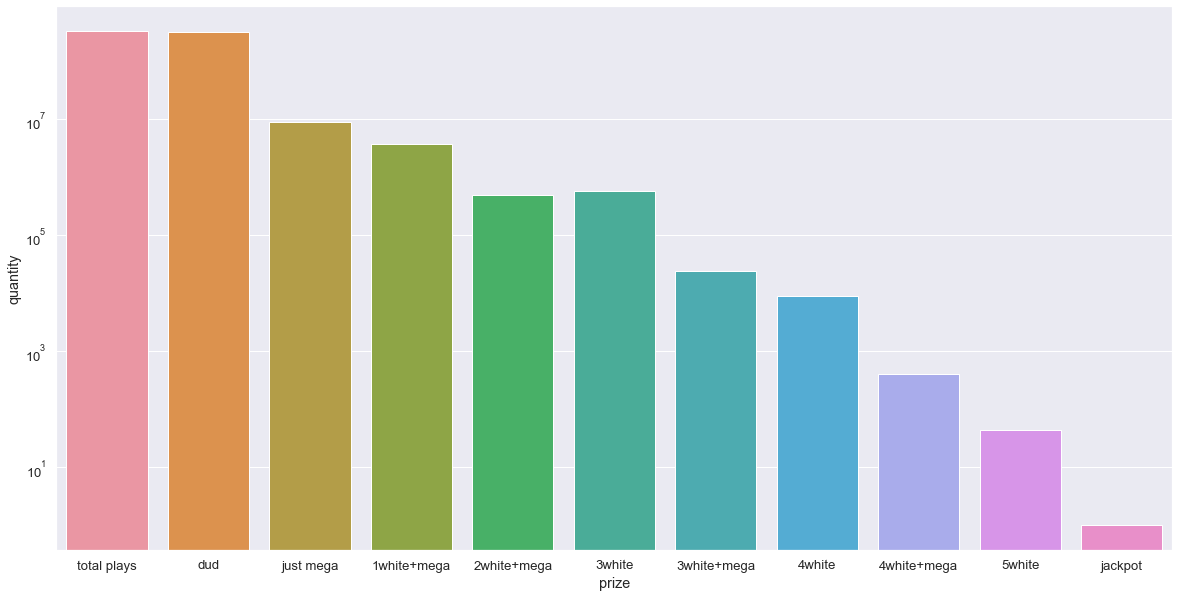

In [ ]:
import seaborn as sb
sb.set_style("dark")
sb.set(font_scale=1.2) 
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set(yscale="log")
ds = {'prize':['total plays','dud', 'just mega', '1white+mega', '2white+mega', '3white','3white+mega', '4white', '4white+mega', '5white', 'jackpot'], 'quantity':[plays, dud, mega, one_white_mega, two_white_mega, three_white, three_white_mega, four_white, four_white_mega, five_white, jackpot]}
dx = pd.DataFrame(ds)
sb.barplot(x='prize', y='quantity', data=dx)


print("total plays:                        ", f"{plays:,d}")
print("total duds:                         ", f"{dud:,d}")
percent_wins = (1-(dud/plays))
percentage = "{:.0%}".format(percent_wins)
print("percent of plays that won any prize:", percentage)
print("-----------------------------------------------------")
print("Prize Type                          ", "Quantity Won")
print("total just mega balls:              ", f"{mega:,d}")
print("total 1white+mega:                  ", f"{one_white_mega:,d}")
print("total 2white+mega:                  ", f"{two_white_mega:,d}")
print("total 3white:                       ", f"{three_white:,d}")
print("total 3white+mega:                  ", f"{three_white_mega:,d}")
print("total 4white:                       ", f"{four_white:,d}")
print("total 4white+mega:                  ", f"{four_white_mega:,d}")
print("total 5white:                       ", f"{five_white:,d}")
print("total jackpot:                      ", f"{jackpot:,d}")

#### Prize Quantity Won & Barplot linear坐标不调整

total plays:                         332,842,963
total duds:                          318,955,658
percent of plays that won any prize: 4%
-----------------------------------------------------
Prize Type                           Quantity Won
total just mega balls:               9,029,055
total 1white+mega:                   3,759,258
total 2white+mega:                   492,944
total 3white:                        572,631
total 3white+mega:                   23,880
total 4white:                        9,092
total 4white+mega:                   401
total 5white:                        43
total jackpot:                       1


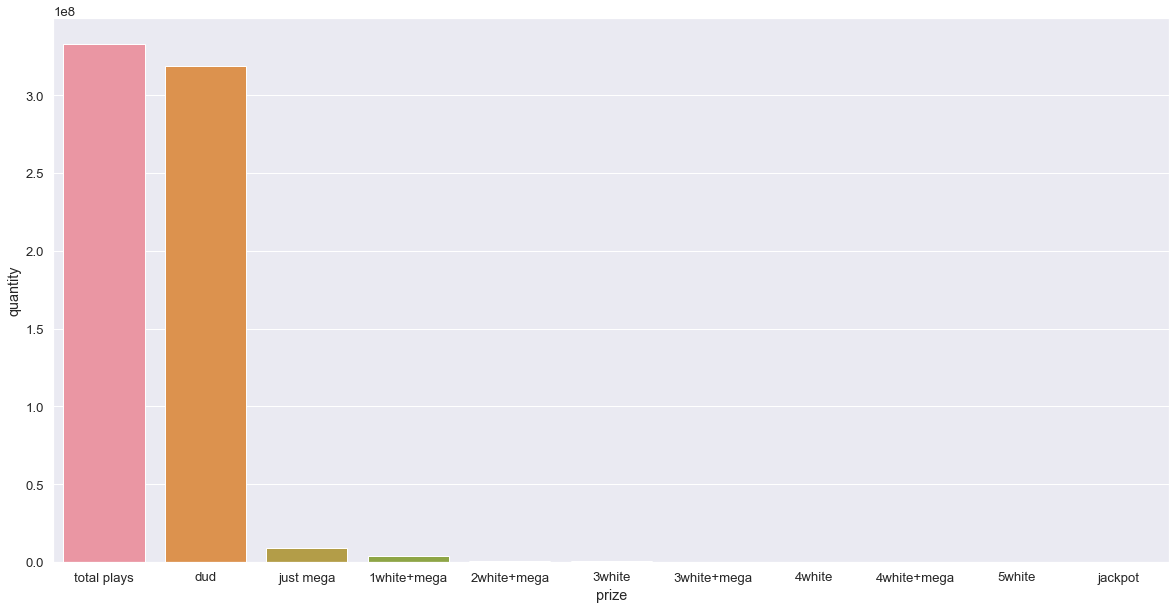

In [ ]:
import seaborn as sb
sb.set_style("dark")
sb.set(font_scale=1.2) 
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ds = {'prize':['total plays','dud', 'just mega', '1white+mega', '2white+mega', '3white','3white+mega', '4white', '4white+mega', '5white', 'jackpot'], 'quantity':[plays, dud, mega, one_white_mega, two_white_mega, three_white, three_white_mega, four_white, four_white_mega, five_white, jackpot]}
dx = pd.DataFrame(ds)
sb.barplot(x='prize', y='quantity', data=dx)


print("total plays:                        ", f"{plays:,d}")
print("total duds:                         ", f"{dud:,d}")
percent_wins = (1-(dud/plays))
percentage = "{:.0%}".format(percent_wins)
print("percent of plays that won any prize:", percentage)
print("-----------------------------------------------------")
print("Prize Type                          ", "Quantity Won")
print("total just mega balls:              ", f"{mega:,d}")
print("total 1white+mega:                  ", f"{one_white_mega:,d}")
print("total 2white+mega:                  ", f"{two_white_mega:,d}")
print("total 3white:                       ", f"{three_white:,d}")
print("total 3white+mega:                  ", f"{three_white_mega:,d}")
print("total 4white:                       ", f"{four_white:,d}")
print("total 4white+mega:                  ", f"{four_white_mega:,d}")
print("total 5white:                       ", f"{five_white:,d}")
print("total jackpot:                      ", f"{jackpot:,d}")

#### How much money Won for per Prize & Barplot linear

total spent:                       $ 665,685,926
total won:                         $ 297,082,892
-----------------------------------------------------
Prize Type                        Won
total just mega balls:             $ 18,058,110
total 1white+mega:                 $ 15,037,032
total 2white+mega:                 $ 4,929,440
total 3white:                      $ 5,726,310
total 3white+mega:                 $ 4,776,000
total 4white:                      $ 4,546,000
total 4white+mega:                 $ 4,010,000
total 5white:                      $ 43,000,000
total jackpot:                     $ 197,000,000


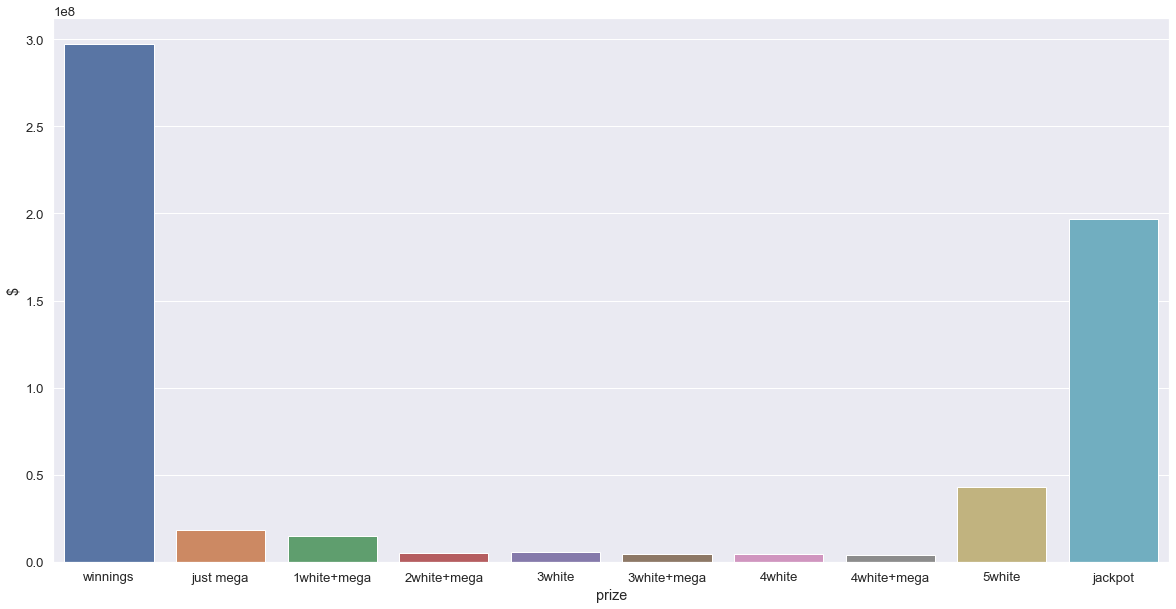

In [ ]:
# Calculate variables
jackpot_winnings = jackpot * 197000000
five_white_winnings = five_white * 1000000
four_white_mega_winnings = four_white_mega * 10000
four_white_winnings = four_white * 500
three_white_mega_winnings = three_white_mega * 200
three_white_winnings = three_white * 10
two_white_mega_winnings = two_white_mega * 10
one_white_mega_winnings = one_white_mega * 4
mega_winnings = mega * 2

import seaborn as sb
sb.set_style("dark")
sb.set(font_scale=1.2) 
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ds = {'prize':['winnings','just mega','1white+mega', '2white+mega', '3white', '3white+mega','4white', '4white+mega', '5white', 'jackpot'],'$':[winnings, mega_winnings, one_white_mega_winnings,two_white_mega_winnings,three_white_winnings,three_white_mega_winnings,four_white_winnings,four_white_mega_winnings,five_white_winnings,jackpot_winnings,]}
dx = pd.DataFrame(ds)
sb.barplot(x='prize', y='$', data=dx)

print("total spent:                       $", f"{ticket_spending:,d}")
print("total won:                         $", f"{winnings:,d}")
print("-----------------------------------------------------")
print("Prize Type                       ", "Won")
print("total just mega balls:             $", f"{mega_winnings:,d}")
print("total 1white+mega:                 $", f"{one_white_mega_winnings:,d}")
print("total 2white+mega:                 $", f"{two_white_mega_winnings:,d}")
print("total 3white:                      $", f"{three_white_winnings:,d}")
print("total 3white+mega:                 $", f"{three_white_mega_winnings:,d}")
print("total 4white:                      $", f"{four_white_winnings:,d}")
print("total 4white+mega:                 $", f"{four_white_mega_winnings:,d}")
print("total 5white:                      $", f"{five_white_winnings:,d}")
print("total jackpot:                     $", f"{jackpot_winnings:,d}")

#### God(Boss)'s view


In [ ]:
print("the winning ticket is...", guessed_balls)

the winning ticket is... [3, 11, 27, 31, 45, 25]


In [ ]:
# Summary statistics
quant_titles = ['total plays','dud', 'just mega', '1white+mega', '2white+mega', '3white','3white+mega', '4white', '4white+mega', '5white', 'jackpot']
quant_vals = [plays, dud, mega, one_white_mega, two_white_mega, three_white, three_white_mega, four_white, four_white_mega, five_white, jackpot]
constants = [-2, 0, 2,4, 10,10,200,500,10000,1000000,197000000]

array_quant_titles = np.array(quant_titles)
array_quant_vals = np.array(quant_vals)
array_constants =np.array(constants)

dataframe = pd.DataFrame({ 'titles': array_quant_titles,'vals': array_quant_vals, 'cost/wins': array_constants})
dataframe['p_l'] = dataframe['vals'] * dataframe['cost/wins']

dataframe

,titles,vals,cost/wins,p_l
0,total plays,332842963,-2,-665685926
1,dud,318955658,0,0
2,just mega,9029055,2,18058110
3,1white+mega,3759258,4,15037032
4,2white+mega,492944,10,4929440
5,3white,572631,10,5726310
6,3white+mega,23880,200,4776000
7,4white,9092,500,4546000
8,4white+mega,401,10000,4010000
9,5white,43,1000000,43000000


## Another way

来自：
https://github.com/CoreyMSchafer/code_snippets/tree/master/Python/Python-Lottery-Simulation

视频教程：
https://www.youtube.com/watch?v=HZ8uXq5VG2w

In [ ]:
# Creating a Lottery Simulator, from https://gist.github.com/Oiselenjakhian/26a7336a19a7cd1136dea3eec4b67cc8
from random import randint # Import the randint function
pickedNumbers = []         # Initialize the empty list

while(len(pickedNumbers) < 6): # Generate numbers from 1 to 36 6 times
  generated = randint(1, 36)
  if (generated not in pickedNumbers):
    pickedNumbers.append(generated)
    
print(pickedNumbers[0])
print(pickedNumbers[1])
print(pickedNumbers[2])
print(pickedNumbers[3])
print(pickedNumbers[4])
print(pickedNumbers[5])

In [ ]:
import random
import json

white_possibles = list(range(1, 70))
red_possibles = list(range(1, 27))

tickets_per_drawing = 100
num_drawings = 15600

total_spent = 0
earnings = 0

times_won = {
    "5+P": 0,
    "5": 0,
    "4+P": 0,
    "4": 0,
    "3+P": 0,
    "3": 0,
    "2+P": 0,
    "1+P": 0,
    "P": 0,
    "0": 0,
}

def calc_win_amt(my_numbers, winning_numbers):
    win_amt = 0

    white_matches = len(my_numbers["whites"].intersection(
        winning_numbers["whites"]))
    power_match = my_numbers["red"] == winning_numbers["red"]

    if white_matches == 5:
        if power_match:
            win_amt = 2_000_000_000
            times_won["5+P"] += 1
        else:
            win_amt = 1_000_000
            times_won["5"] += 1
    elif white_matches == 4:
        if power_match:
            win_amt = 50_000
            times_won["4+P"] += 1
        else:
            win_amt = 100
            times_won["4"] += 1
    elif white_matches == 3:
        if power_match:
            win_amt = 100
            times_won["3+P"] += 1
        else:
            win_amt = 7
            times_won["3"] += 1
    elif white_matches == 2 and power_match:
        win_amt = 7
        times_won["2+P"] += 1
    elif white_matches == 1 and power_match:
        win_amt = 4
        times_won["1+P"] += 1
    elif power_match:
        win_amt = 4
        times_won["P"] += 1
    else:
        times_won["0"] += 1

    return win_amt


# for drawing in range(num_drawings):
hit_jp = False
drawings = 0
years = 0
while True:
    drawings += 1
    white_drawing = set(random.sample(white_possibles, k=5))
    red_drawing = random.choice(red_possibles)

    winning_numbers = {"whites": white_drawing, "red": red_drawing}

    for ticket in range(tickets_per_drawing):
        total_spent += 2
        my_whites = set(random.sample(white_possibles, k=5))
        my_red = random.choice(red_possibles)

        my_numbers = {"whites": my_whites, "red": my_red}

        win_amt = calc_win_amt(my_numbers, winning_numbers)
        earnings += win_amt

        if win_amt == 2_000_000_000:
            hit_jp = True
            break

    if drawings % 156 == 0:
        years += 1
        print(f'{years} years')

    if hit_jp:
        break

print(f'Spent: ${total_spent}')
print(f'Earnings: ${earnings}')

print(json.dumps(times_won, indent=2))